#**TRANSACTION FRAUD DETECTION USING MACHINE LEARNING**

#IMPORTING LIBRARIES TO RUN THE ALGORITHM

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Dataset Preprocessing

In [43]:
W_Data=pd.read_csv("creditcard.csv")
W_Data.dropna(thresh=284315)
Data=W_Data
Data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968,10980,1.284388,-0.013181,0.646174,0.198985,-0.568675,-0.526121,-0.448235,-0.167709,1.773223,-0.519404,0.161145,-2.544463,1.884534,1.442652,0.619497,0.644020,0.098878,0.330833,-0.200774,-0.063281,-0.101868,-0.030298,-0.081412,-0.123281,0.278808,1.064001,-0.090181,0.000481,15.95,0.0
7969,10981,1.190428,-0.122329,0.954945,0.267101,-0.971026,-0.652279,-0.612992,-0.003909,1.633117,-0.318143,2.330536,-2.209314,0.545743,1.907179,-0.011898,0.677038,0.181601,0.722285,-0.182498,-0.150267,-0.015001,0.127027,0.012079,0.534409,0.112179,1.004483,-0.100188,-0.004774,14.95,0.0
7970,10981,-0.725175,0.298202,1.824761,-2.587170,0.283605,-0.016617,0.153659,0.045084,-0.197611,-0.674963,1.095737,-2.909335,2.066815,1.051837,-1.684076,2.293792,-0.372457,-0.236906,-0.501182,-0.001388,-0.017097,-0.070535,-0.442861,-0.895837,0.624743,-0.510601,-0.031142,0.025564,12.95,0.0
7971,10981,1.226153,-0.129645,0.735197,0.142752,-0.703245,-0.349641,-0.612641,0.020507,1.648986,-0.321755,1.875102,-2.311686,0.777992,1.847948,0.011394,0.826476,-0.020695,0.879692,0.018045,-0.122552,-0.047936,0.040196,-0.057391,-0.012386,0.187685,1.037786,-0.100081,-0.009869,15.95,0.0


In [44]:
Data.sample(frac=0.1).head(n=5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2203,1722,1.605329,-0.938477,-0.178057,-1.646642,-0.756636,-0.187819,-0.851085,-0.245318,-1.929063,1.415726,-1.554478,-0.703856,2.020442,-0.655287,0.520477,-0.095254,-0.070090,0.413706,0.195110,-0.182756,-0.131774,0.094556,-0.266657,-0.964364,0.761879,0.041884,0.033562,0.007736,22.75,0.0
2609,2139,-3.975475,2.387299,0.061287,-1.121528,-2.343846,-0.792692,-1.430377,2.038205,1.054185,-0.093363,-1.407270,0.866593,0.129093,0.323305,-0.433710,0.795683,0.309408,-0.249796,-0.599240,0.034540,-0.103319,-0.189793,0.121646,0.442897,0.237122,0.834193,-0.221939,-0.094345,20.00,0.0
2386,1937,-5.104692,-5.838155,-0.952477,4.449005,-0.304528,1.374297,3.267331,-1.119640,-0.783320,1.412059,1.914853,-0.038626,-0.007007,0.077030,1.530058,0.013989,-0.194767,-0.314135,0.423418,-1.024936,-0.344246,0.881495,0.470187,-0.093402,-1.274737,0.086849,0.464011,0.509149,1321.12,0.0
5473,5504,-0.738377,0.860381,1.260867,-0.051251,0.854271,1.362227,0.040346,0.652440,0.937356,-0.741576,3.115344,-2.409459,-0.060779,1.616114,0.739481,-0.648065,1.779777,-1.114914,-1.534234,-0.188945,-0.249761,-0.398134,0.197991,-1.178376,-0.581077,0.139913,0.148226,0.053889,1.29,0.0
3450,2940,-0.438914,0.671404,1.294900,-1.957891,0.090522,-1.341552,1.100994,-0.333205,0.807928,-1.191809,0.339911,0.434177,-0.425685,0.159118,1.107113,-1.024228,-0.092986,-0.568483,-0.659685,-0.025057,0.121962,0.759278,-0.199557,0.609514,-0.073956,-0.842426,0.255422,-0.011901,1.00,0.0


In [45]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,-0.164082,0.635874,-1.022368,0.690562,0.561420,-0.067884,-0.035773,0.279405,-0.060423,-0.055885,0.043110,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,1.084482,1.131918,1.510336,1.238190,1.137602,0.983633,0.841755,0.852101,0.791354,0.811364,0.605707,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,-7.454841,-2.595325,-10.912819,-3.389510,-11.736729,-4.152532,-7.552342,-12.598419,-5.131549,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,-0.673111,-0.165456,-2.273429,-0.212730,-0.050796,-0.654293,-0.547605,-0.257929,-0.506580,-0.548056,-0.147399,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,-0.258630,0.623438,-1.042323,0.710567,0.565118,0.057160,0.023556,0.237956,-0.027308,-0.051841,-0.007344,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,0.243533,1.416838,0.303311,1.638147,1.400274,0.596297,0.517720,0.751774,0.416734,0.468180,0.173362,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,12.259949,7.620089,3.774837,4.465413,5.748734,3.635042,4.087802,6.739384,3.042493,3.097749,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


#Data Visualisation

In [46]:
Positives=W_Data[W_Data['Class']==1]
Negatives=W_Data[W_Data['Class']==0]

Text(0, 0.5, 'Frequency')

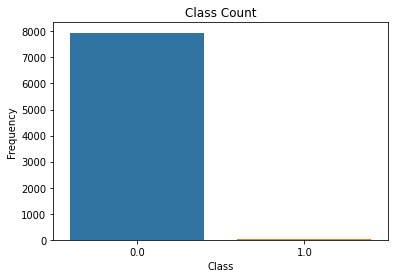

In [47]:
class_count = pd.value_counts(Data['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=Data)
plt.title("Class Count")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [48]:
print((len(Positives)/len(W_Data))*100,"%")

0.3135582591245453 %


In [49]:
fraud = Data[Data.Class == 1]
normal = Data[Data.Class == 0]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

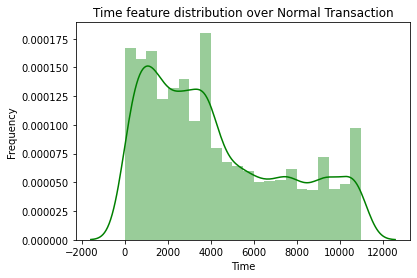

In [50]:
sns.distplot(normal.Time, color='g')
plt.title("Time feature distribution over Normal Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

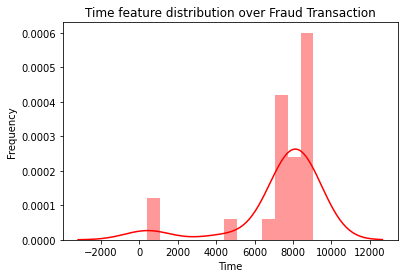

In [51]:
sns.distplot(fraud.Time, color='r')
plt.title("Time feature distribution over Fraud Transaction")
plt.xlabel("Time")
plt.ylabel("Frequency")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

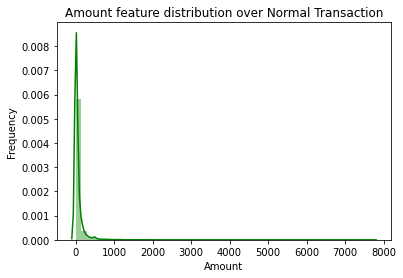

In [52]:
sns.distplot(normal.Amount, color='g')
plt.title("Amount feature distribution over Normal Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

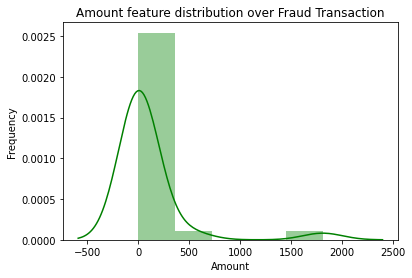

In [53]:
sns.distplot(fraud.Amount, color='g')
plt.title("Amount feature distribution over Fraud Transaction")
plt.xlabel("Amount")
plt.ylabel("Frequency")

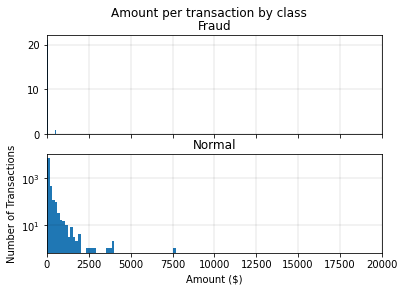

In [54]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

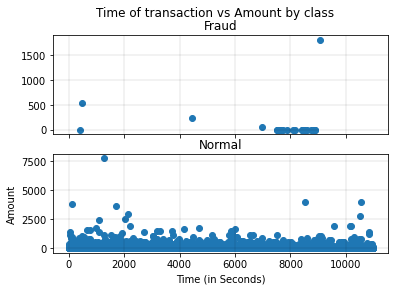

In [55]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax1.grid(color='k', linestyle='-', linewidth=0.1)


ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
ax2.grid(color='k', linestyle='-', linewidth=0.1)


plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#Data Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
model_data = Data.drop(['Time'], axis=1)
model_data['Amount'] = StandardScaler().fit_transform(Data['Amount'].values.reshape(-1, 1))
model_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.432052,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.321826,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.607225,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.298034,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.023481,0.0


In [57]:
model_data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [58]:
model_data.dropna(inplace=True)

In [59]:
model_data.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Splitting data into features and labels

In [60]:
model_train = model_data.drop("Class", 1).values
model_test = model_data["Class"].values

downsampling using SMOTE

In [61]:
from imblearn.over_sampling import SMOTE
#from imblearn.combine import SMOTETomek

oversampler = SMOTE(random_state = 0, n_jobs = -1)
#sampler = SMOTETomek(random_state = 0)
model_train_lr , model_test_lr = oversampler.fit_resample(model_train, model_test)

#Train Test Split

In [62]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(model_train_lr, model_test_lr, test_size = 0.25, random_state = 0)

#Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200, random_state=0, n_jobs = -1)
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)

Accuracy: 99.9497%
Recall: 100.0000%
ROC AUC: 99.9487%


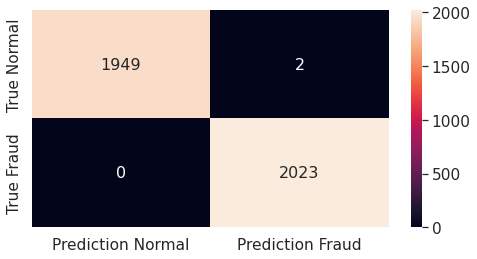

In [64]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,roc_auc_score
import seaborn as sns
from matplotlib import pyplot

lr_accuracy = accuracy_score(Y_test, lr_predict)
lr_recall = recall_score(Y_test, lr_predict)
lr_cm = confusion_matrix(Y_test, lr_predict)
lr_auc = roc_auc_score(Y_test, lr_predict)

print("Accuracy: {:.4%}".format(lr_accuracy))
print("Recall: {:.4%}".format(lr_recall))
print("ROC AUC: {:.4%}".format(lr_auc))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

#Support Vector Classifier

In [65]:
clf_l=svm.SVC(kernel='linear')
clf_l.fit(X_train,Y_train)
print(classification_report(Y_test,clf_l.predict(X_test)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1951
         1.0       1.00      1.00      1.00      2023

    accuracy                           1.00      3974
   macro avg       1.00      1.00      1.00      3974
weighted avg       1.00      1.00      1.00      3974



#Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 200, criterion = 'entropy', random_state = 0, n_jobs = -1)
rf.fit(X_train, Y_train)
rf_predict = rf.predict(X_test)

Accuracy: 100.0000%
Recall: 100.0000%
ROC AUC: 100.0000%


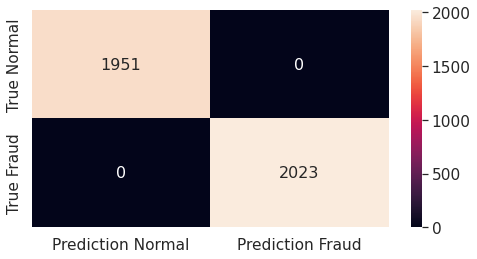

In [67]:
rf_accuracy = accuracy_score(Y_test, rf_predict)
rf_recall = recall_score(Y_test, rf_predict)
rf_cm = confusion_matrix(Y_test, rf_predict)
rf_auc = roc_auc_score(Y_test, rf_predict)

print("Accuracy: {:.4%}".format(rf_accuracy))
print("Recall: {:.4%}".format(rf_recall))
print("ROC AUC: {:.4%}".format(rf_auc))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')

# Optimal No of Clusters

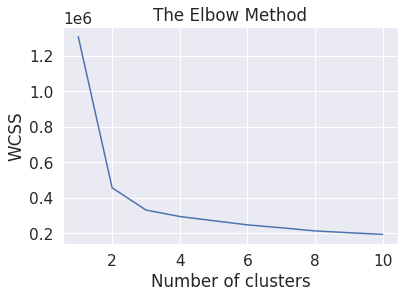

In [68]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 200, random_state = 0)
    kmeans.fit(X_train,Y_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#K-Means Clustering

In [69]:
X_train.shape

(11920, 29)

In [70]:
Y_train.shape

(11920,)

In [71]:
kmeans = KMeans(n_clusters = 2, max_iter = 200, random_state = 0).fit(X_train,Y_train)
centers = kmeans.cluster_centers_

In [72]:
from scipy import spatial
distance = pd.DataFrame(spatial.distance.cdist(X_test, centers, 'euclidean'))
distance['distance_mean'] = distance.apply(np.mean, axis=1)
distance.head()

,0,1,distance_mean
0,5.071380,18.095050,11.583215
1,17.541396,7.291548,12.416472
2,6.383472,18.685921,12.534696
3,5.628673,18.330074,11.979373
4,14.552277,13.668755,14.110516


In [73]:
out_per = np.percentile(distance['distance_mean'], 95)
model_predict_km = np.where(distance['distance_mean'] >= out_per, 1, 0)

In [74]:
Y_test.shape

(3974,)

In [75]:
model_predict_km.shape

(3974,)

Accuracy: 51.3337%
Recall: 7.1181%
ROC AUC: 52.1495%


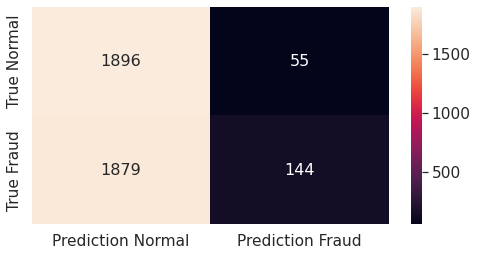

In [76]:
km_accuracy = accuracy_score(Y_test, model_predict_km)
km_recall = recall_score(Y_test, model_predict_km)
km_cm = confusion_matrix(Y_test, model_predict_km)
km_auc = roc_auc_score(Y_test, model_predict_km)

print("Accuracy: {:.4%}".format(km_accuracy))
print("Recall: {:.4%}".format(km_recall))
print("ROC AUC: {:.4%}".format(km_auc))

km_cm = pd.DataFrame(km_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
pyplot.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(km_cm, annot=True,annot_kws={"size": 16},fmt='g')

#INFERENCE

In [77]:
Prediction_Accuracy={
    'Logistic Regression': lr_accuracy,
    'Random Forest': rf_accuracy,
    'K-Means': km_accuracy
}

Prediction_Recall={
    'Logistic Regression': lr_recall,
    'Random Forest': rf_recall,
    'K-Means': km_recall
}

Prediction_AUC={
    'Logistic Regression': lr_auc,
    'Random Forest': rf_auc,
    'K-Means': km_auc
}

Text(0.5, 0, 'Accuracy Score')

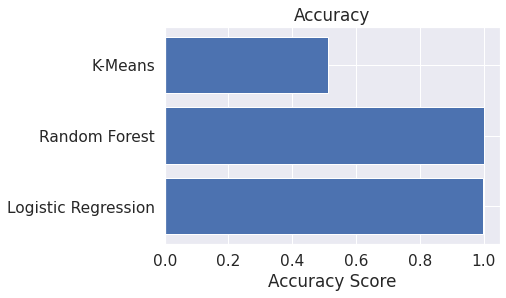

In [78]:
pyplot.title('Accuracy')
pyplot.barh(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.values()), align='center')
pyplot.yticks(range(len(Prediction_Accuracy)), list(Prediction_Accuracy.keys()))
pyplot.xlabel('Accuracy Score')

Text(0.5, 0, 'Recall Score')

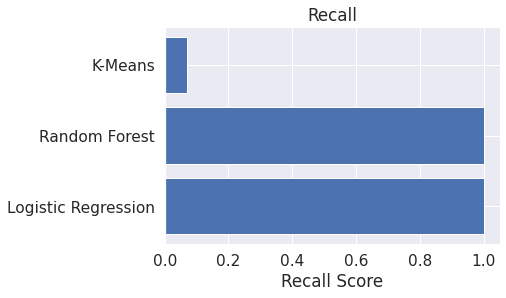

In [79]:
pyplot.title('Recall')
pyplot.barh(range(len(Prediction_Recall)), list(Prediction_Recall.values()), align='center')
pyplot.yticks(range(len(Prediction_Recall)), list(Prediction_Recall.keys()))
pyplot.xlabel('Recall Score')

Text(0.5, 0, 'AUC Score')

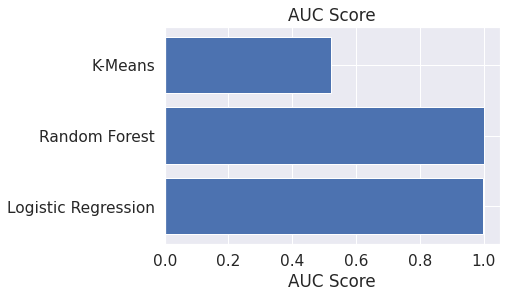

In [80]:
pyplot.title('AUC Score')
pyplot.barh(range(len(Prediction_AUC)), list(Prediction_AUC.values()), align='center')
pyplot.yticks(range(len(Prediction_AUC)), list(Prediction_AUC.keys()))
pyplot.xlabel('AUC Score')